In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.logging.set_verbosity(tf.logging.ERROR)

In [3]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

In [4]:
base_dir=os.path.join(os.path.dirname(zip_dir),'cats_and_dogs_filtered')
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')

train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')
validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')

In [5]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [6]:
BATCH_SIZE=100
IMG_SHAPE=150


In [7]:
def plot_images(img_arr):
    fig,axes=plt.subplots(5,5,figsize=(20,20))
    axes=axes.flatten()
    for img , axes in zip(img_arr,axes):
        axes.imshow(img)
    plt.tight_layout()
    plt.show()


In [8]:
image_gen_train=ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest' )

train_data_gen=image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                  directory=train_dir,
                                                  shuffle=True,
                                                  target_size=(IMG_SHAPE,IMG_SHAPE),
                                                  class_mode='binary')

Found 2000 images belonging to 2 classes.


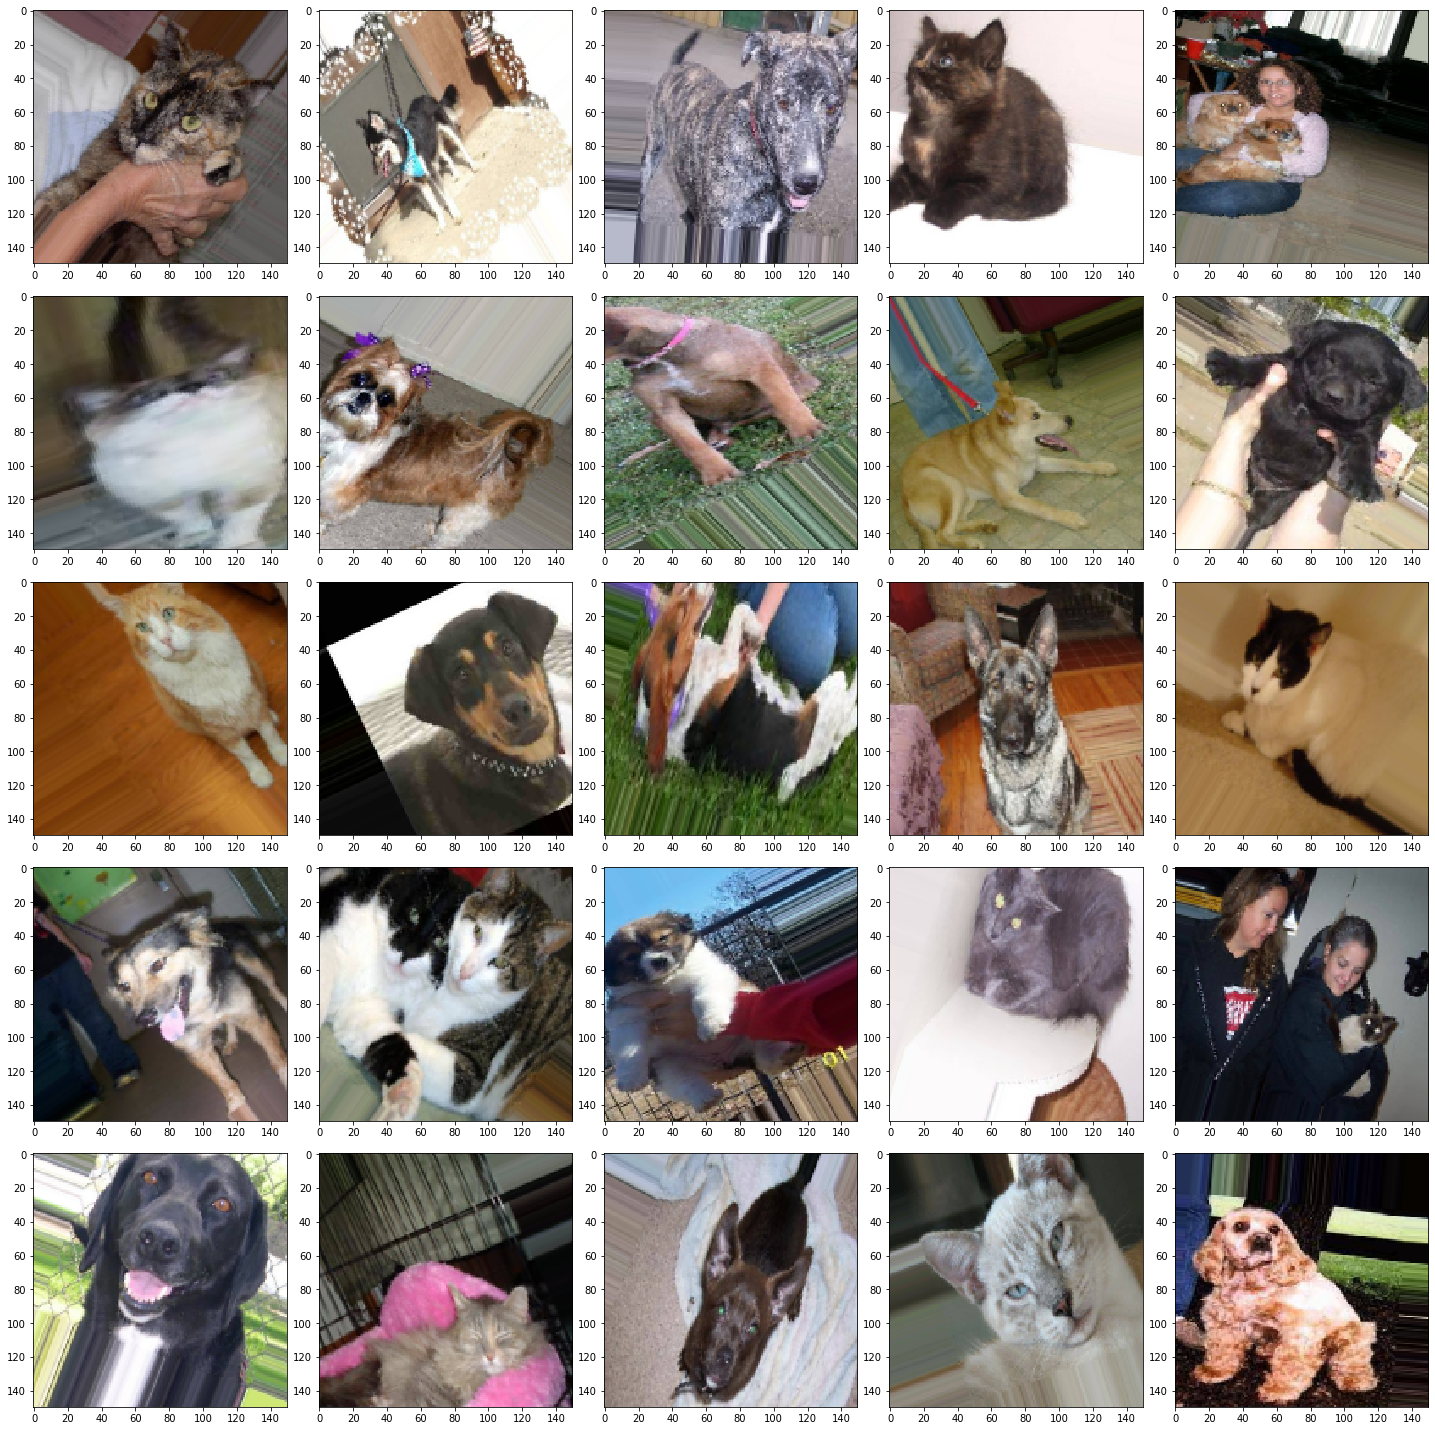

In [9]:
augmented_images = [train_data_gen[0][0][i] for i in range(25)]
plot_images(augmented_images)

In [10]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE, 
                                                 directory=validation_dir, 
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [11]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax')
    
])

In [12]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [18]:
EPOCHS=10
history=model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train/float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val/float(BATCH_SIZE)))
)

Epoch 1/10
20/20 [==============================] - 134s 7s/step - loss: 0.5247 - acc: 0.7350 - val_loss: 0.5105 - val_acc: 0.7540
Epoch 2/10
20/20 [==============================] - 129s 6s/step - loss: 0.5343 - acc: 0.7395 - val_loss: 0.5067 - val_acc: 0.7450
Epoch 3/10
20/20 [==============================] - 129s 6s/step - loss: 0.5173 - acc: 0.7510 - val_loss: 0.5032 - val_acc: 0.7530
Epoch 4/10
20/20 [==============================] - 129s 6s/step - loss: 0.5236 - acc: 0.7310 - val_loss: 0.5161 - val_acc: 0.7630
Epoch 5/10
20/20 [==============================] - 129s 6s/step - loss: 0.5157 - acc: 0.7460 - val_loss: 0.5360 - val_acc: 0.7340
Epoch 6/10
20/20 [==============================] - 129s 6s/step - loss: 0.5187 - acc: 0.7470 - val_loss: 0.4978 - val_acc: 0.7610
Epoch 7/10
20/20 [==============================] - 131s 7s/step - loss: 0.5089 - acc: 0.7485 - val_loss: 0.4834 - val_acc: 0.7630
Epoch 8/10
20/20 [==============================] - 133s 7s/step - loss: 0.5136 - a

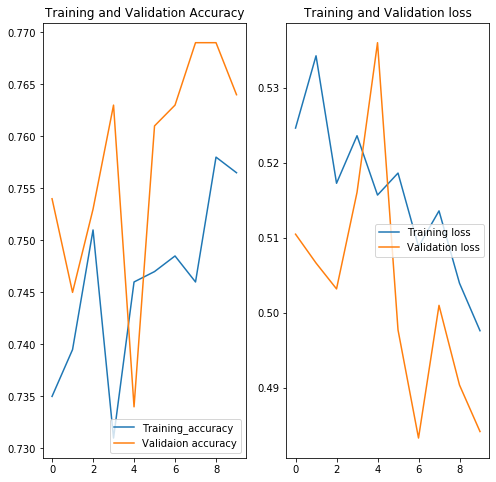

In [19]:
acc=history.history['acc']
val_acc=history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(EPOCHS)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training_accuracy')
plt.plot(epochs_range,val_acc,label='Validaion accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training loss')
plt.plot(epochs_range,val_loss,label='Validation loss')
plt.legend(loc='center right')
plt.title('Training and Validation loss')
plt.savefig('./foo.png')
plt.show()


57344/52501 [================================] - 0s 6us/step


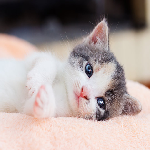

In [49]:
import PIL.Image as Image
dog=tf.keras.utils.get_file('cat11.jpg','https://img.purch.com/w/660/aHR0cDovL3d3dy5saXZlc2NpZW5jZS5jb20vaW1hZ2VzL2kvMDAwLzEwNC84MzAvb3JpZ2luYWwvc2h1dHRlcnN0b2NrXzExMTA1NzIxNTkuanBn')
dog=Image.open(dog).resize((150,150))
dog

In [50]:
dog=np.array(dog)/255.0
dog.shape

(150, 150, 3)

In [51]:
result=model.predict(dog[np.newaxis, ...])
result.shape

(1, 2)

In [52]:
predicted_class=np.argmax(result[0],axis=-1)
predicted_class

0

In [53]:
class_labels=['cats','Dogs']
predicted_class_name=class_labels[predicted_class]

Text(0.5, 1.0, 'prediction:Cats')

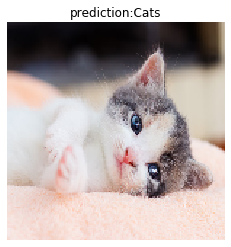

In [54]:
plt.imshow(dog)
plt.axis('off')
plt.title("prediction:" + predicted_class_name.title())